<a href="https://colab.research.google.com/github/pujaroy280/DATA620WebAnalytics/blob/main/DATA_620_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For your first project, you are asked to

Identify and load a network dataset that has some categorical information available for each node.
For each of the nodes in the dataset, calculate degree centrality and eigenvector centrality.
Compare your centrality measures across your categorical groups.

In [ ]:

import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

### Group (The DataDriven Team): Susanna Wong, Puja Roy, Mikhail Broomes & Marjete Vucinaj & Danny

### Video : https://drive.google.com/file/d/1QwnQF0R0YHp3VAp-rhVIdzQMJztKiE2I/view?usp=sharing


## Load Dataset

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/suswong/DATA-620/main/NYPD_Arrest_Data__Year_to_Date__20240612.csv")
df

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,...,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column,Community Districts,Borough Boundaries,City Council Districts,Police Precincts,Zip Codes
0,280255493,01/10/2024,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601001,F,M,26,...,996342,236149,40.814845,-73.956312,POINT (-73.956312 40.814845),37.0,4.0,23.0,17.0,12424.0
1,279805419,01/02/2024,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,K,77,...,1003509,185018,40.674496,-73.930571,POINT (-73.9305713255961 40.6744956865259),16.0,2.0,49.0,49.0,17615.0
2,279895750,01/03/2024,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,Q,106,...,1026836,180689,40.662526,-73.846499,POINT (-73.846499 40.662526),62.0,3.0,41.0,64.0,15314.0
3,280809090,01/19/2024,511.0,"CONTROLLED SUBSTANCE, POSSESSI",235.0,DANGEROUS DRUGS,PL 2200300,M,B,49,...,1027430,251104,40.855793,-73.843908,POINT (-73.843908 40.855793),59.0,5.0,12.0,32.0,11270.0
4,280357135,01/11/2024,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200502,F,K,81,...,1002457,192292,40.694456,-73.934343,POINT (-73.934343 40.694456),69.0,2.0,49.0,52.0,18181.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63616,282877412,02/27/2024,339.0,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,M,K,60,...,987154,149165,40.576100,-73.989545,POINT (-73.989545 40.5761),21.0,2.0,45.0,35.0,18184.0
63617,283628088,03/12/2024,511.0,"CONTROLLED SUBSTANCE, POSSESSI",235.0,DANGEROUS DRUGS,PL 2200300,M,M,13,...,985689,208933,40.740151,-73.994805,POINT (-73.994805 40.740151),11.0,4.0,10.0,7.0,12074.0
63618,283387006,03/07/2024,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 160102A,F,K,73,...,1008227,183789,40.671104,-73.913562,POINT (-73.913562 40.671104),55.0,2.0,17.0,46.0,17614.0
63619,283013910,03/01/2024,922.0,"TRAFFIC,UNCLASSIFIED MISDEMEAN",348.0,VEHICLE AND TRAFFIC LAWS,VTL05110A4,M,K,83,...,1007120,193913,40.698894,-73.917522,POINT (-73.91752179908735 40.698893568968515),42.0,2.0,37.0,53.0,13828.0


# Data Preparation

## Dataset

There are 63621 entries in this dataset. Not every column has non-null count of 63621 entries. Thus, there are missing values in the following columns: "PD_DESC", "KY_CD", "LAW_CAT_CD", "Community Districts", "Borough Boundaries", "City Council Districts", "Police Precincts", and "Zip Codes".
    

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63621 entries, 0 to 63620
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ARREST_KEY                63621 non-null  int64  
 1   ARREST_DATE               63621 non-null  object 
 2   PD_CD                     63619 non-null  float64
 3   PD_DESC                   63621 non-null  object 
 4   KY_CD                     63612 non-null  float64
 5   OFNS_DESC                 63621 non-null  object 
 6   LAW_CODE                  63621 non-null  object 
 7   LAW_CAT_CD                63219 non-null  object 
 8   ARREST_BORO               63621 non-null  object 
 9   ARREST_PRECINCT           63621 non-null  int64  
 10  JURISDICTION_CODE         63621 non-null  int64  
 11  AGE_GROUP                 63621 non-null  object 
 12  PERP_SEX                  63621 non-null  object 
 13  PERP_RACE                 63621 non-null  object 
 14  X_COOR

In [ ]:
df.isnull().any()
df.nunique()

ARREST_KEY                  63621
ARREST_DATE                    91
PD_CD                         231
PD_DESC                       221
KY_CD                          66
OFNS_DESC                      62
LAW_CODE                      770
LAW_CAT_CD                      6
ARREST_BORO                     5
ARREST_PRECINCT                77
JURISDICTION_CODE              25
AGE_GROUP                       5
PERP_SEX                        2
PERP_RACE                       7
X_COORD_CD                  15785
Y_COORD_CD                  16393
Latitude                    17663
Longitude                   17629
New Georeferenced Column    17879
Community Districts            70
Borough Boundaries              5
City Council Districts         51
Police Precincts               77
Zip Codes                     199
dtype: int64

## Drop Columns

Drop any columns that is not necessary for the analysis. We dropped the following columns: 'PD_CD','PD_DESC', 'KY_CD', 'LAW_CODE', 'JURISDICTION_CODE', 'Borough Boundaries', 'City Council Districts', 'Police Precincts', 'Zip Codes'



In [ ]:
arrest_data = df.copy()

drop_columns = ['PD_CD','PD_DESC', 'KY_CD', 'LAW_CODE', 'ARREST_PRECINCT','JURISDICTION_CODE', 'Borough Boundaries', 'City Council Districts', 'Police Precincts', 'Zip Codes','X_COORD_CD',	'Y_COORD_CD',	'Latitude',	'Longitude',	'New Georeferenced Column']
arrest_data.drop(columns=drop_columns, inplace=True)
arrest_data

,ARREST_KEY,ARREST_DATE,OFNS_DESC,LAW_CAT_CD,ARREST_BORO,AGE_GROUP,PERP_SEX,PERP_RACE,Community Districts
0,280255493,01/10/2024,ROBBERY,F,M,<18,M,BLACK,37.0
1,279805419,01/02/2024,RAPE,F,K,25-44,M,WHITE HISPANIC,16.0
2,279895750,01/03/2024,ASSAULT 3 & RELATED OFFENSES,M,Q,65+,F,WHITE,62.0
3,280809090,01/19/2024,DANGEROUS DRUGS,M,B,45-64,M,BLACK,59.0
4,280357135,01/11/2024,FELONY ASSAULT,F,K,25-44,F,BLACK,69.0
...,...,...,...,...,...,...,...,...,...
63616,282877412,02/27/2024,PETIT LARCENY,M,K,45-64,M,WHITE HISPANIC,21.0
63617,283628088,03/12/2024,DANGEROUS DRUGS,M,M,45-64,M,BLACK,11.0
63618,283387006,03/07/2024,ROBBERY,F,K,25-44,M,BLACK,55.0
63619,283013910,03/01/2024,VEHICLE AND TRAFFIC LAWS,M,K,25-44,F,BLACK,42.0


In [ ]:
arrest_data.isnull().any()

ARREST_KEY             False
ARREST_DATE            False
OFNS_DESC              False
LAW_CAT_CD              True
ARREST_BORO            False
AGE_GROUP              False
PERP_SEX               False
PERP_RACE              False
Community Districts     True
dtype: bool

In [ ]:
arrest_data.isnull().sum()

ARREST_KEY               0
ARREST_DATE              0
OFNS_DESC                0
LAW_CAT_CD             402
ARREST_BORO              0
AGE_GROUP                0
PERP_SEX                 0
PERP_RACE                0
Community Districts      5
dtype: int64

In [ ]:
arrest_data.dropna(inplace=True)
arrest_data


,ARREST_KEY,ARREST_DATE,OFNS_DESC,LAW_CAT_CD,ARREST_BORO,AGE_GROUP,PERP_SEX,PERP_RACE,Community Districts
0,280255493,01/10/2024,ROBBERY,F,M,<18,M,BLACK,37.0
1,279805419,01/02/2024,RAPE,F,K,25-44,M,WHITE HISPANIC,16.0
2,279895750,01/03/2024,ASSAULT 3 & RELATED OFFENSES,M,Q,65+,F,WHITE,62.0
3,280809090,01/19/2024,DANGEROUS DRUGS,M,B,45-64,M,BLACK,59.0
4,280357135,01/11/2024,FELONY ASSAULT,F,K,25-44,F,BLACK,69.0
...,...,...,...,...,...,...,...,...,...
63616,282877412,02/27/2024,PETIT LARCENY,M,K,45-64,M,WHITE HISPANIC,21.0
63617,283628088,03/12/2024,DANGEROUS DRUGS,M,M,45-64,M,BLACK,11.0
63618,283387006,03/07/2024,ROBBERY,F,K,25-44,M,BLACK,55.0
63619,283013910,03/01/2024,VEHICLE AND TRAFFIC LAWS,M,K,25-44,F,BLACK,42.0


In [ ]:
arrest_data.isnull().sum()

ARREST_KEY             0
ARREST_DATE            0
OFNS_DESC              0
LAW_CAT_CD             0
ARREST_BORO            0
AGE_GROUP              0
PERP_SEX               0
PERP_RACE              0
Community Districts    0
dtype: int64

# Creating Network Analysis for Crime vs Community District

In [ ]:
G = nx.Graph()

In [ ]:
grouped = df.groupby('Community Districts')['OFNS_DESC'].apply(list)
grouped

Community Districts
1.0     [DANGEROUS DRUGS, ARSON, ASSAULT 3 & RELATED O...
2.0     [ASSAULT 3 & RELATED OFFENSES, INTOXICATED & I...
3.0     [POSSESSION OF STOLEN PROPERTY, POSSESSION OF ...
4.0     [VEHICLE AND TRAFFIC LAWS, OFFENSES AGAINST PU...
5.0     [ARSON, VEHICLE AND TRAFFIC LAWS, VEHICLE AND ...
                              ...                        
67.0    [POSSESSION OF STOLEN PROPERTY, ASSAULT 3 & RE...
68.0    [FELONY ASSAULT, ROBBERY, GRAND LARCENY, CRIMI...
69.0    [FELONY ASSAULT, FELONY ASSAULT, FELONY ASSAUL...
70.0    [PETIT LARCENY, ASSAULT 3 & RELATED OFFENSES, ...
71.0    [ASSAULT 3 & RELATED OFFENSES, GRAND LARCENY, ...
Name: OFNS_DESC, Length: 70, dtype: object

In [ ]:
grouped = df.groupby('Community Districts')['OFNS_DESC'].apply(list)

print(grouped)

Community Districts
1.0     [DANGEROUS DRUGS, ARSON, ASSAULT 3 & RELATED O...
2.0     [ASSAULT 3 & RELATED OFFENSES, INTOXICATED & I...
3.0     [POSSESSION OF STOLEN PROPERTY, POSSESSION OF ...
4.0     [VEHICLE AND TRAFFIC LAWS, OFFENSES AGAINST PU...
5.0     [ARSON, VEHICLE AND TRAFFIC LAWS, VEHICLE AND ...
                              ...                        
67.0    [POSSESSION OF STOLEN PROPERTY, ASSAULT 3 & RE...
68.0    [FELONY ASSAULT, ROBBERY, GRAND LARCENY, CRIMI...
69.0    [FELONY ASSAULT, FELONY ASSAULT, FELONY ASSAUL...
70.0    [PETIT LARCENY, ASSAULT 3 & RELATED OFFENSES, ...
71.0    [ASSAULT 3 & RELATED OFFENSES, GRAND LARCENY, ...
Name: OFNS_DESC, Length: 70, dtype: object


In [ ]:
for community, crimes in grouped.items():
    for crime in crimes:
        G.add_node(crime)
    for crime1, crime2 in combinations(crimes, 2):
        G.add_edge(crime1, crime2, community=community)

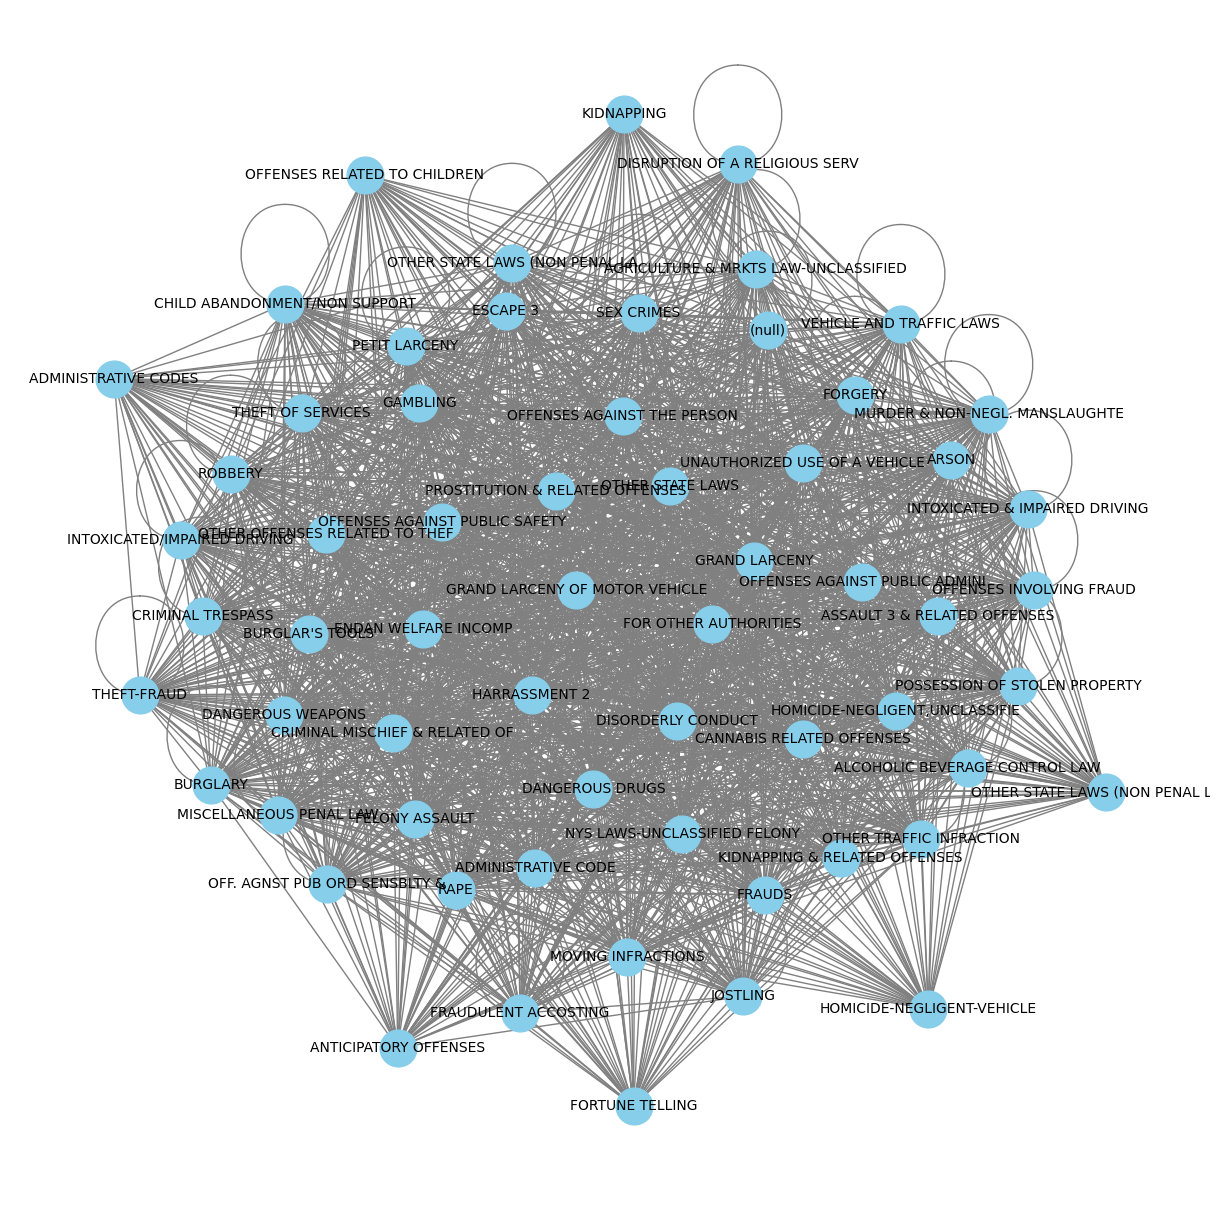

In [ ]:
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)

nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=10, font_color='black', edge_color='gray')
plt.show()


Calculate degree centrality which measure number of connections nodes have and eigenvector centrality which measures influences and wellconnectedness. Create a dataframe with both measures and generate summary statistics of it.
-  Interpret the Summary Statistics?

In [ ]:
degree_centrality = nx.degree_centrality(G)

eigenvector_centrality = nx.eigenvector_centrality(G)

centrality_df = pd.DataFrame({
    'Degree Centrality': degree_centrality,
    'Eigenvector Centrality': eigenvector_centrality})

summary_stats = centrality_df.describe()
print(summary_stats)

       Degree Centrality  Eigenvector Centrality
count          62.000000               62.000000
mean            0.958752                0.126360
std             0.114494                0.012837
min             0.655738                0.091504
25%             0.938525                0.124734
50%             1.032787                0.134423
75%             1.032787                0.134423
max             1.032787                0.134423


filter top centrality

In [ ]:

sorted_degree = centrality_df.sort_values(by='Degree Centrality', ascending=False)
print("\nTop Degree Centrality:")
print(sorted_degree.head())

sorted_eigenvector = centrality_df.sort_values(by='Eigenvector Centrality', ascending=False)
print("\nTop Eigenvector Centrality:")
print(sorted_eigenvector.head())


Top Degree Centrality:
                                Degree Centrality  Eigenvector Centrality
DANGEROUS DRUGS                          1.032787                0.134423
POSSESSION OF STOLEN PROPERTY            1.032787                0.134423
INTOXICATED/IMPAIRED DRIVING             1.032787                0.134423
MURDER & NON-NEGL. MANSLAUGHTE           1.032787                0.134423
FOR OTHER AUTHORITIES                    1.032787                0.134423

Top Eigenvector Centrality:
                                Degree Centrality  Eigenvector Centrality
DANGEROUS DRUGS                          1.032787                0.134423
POSSESSION OF STOLEN PROPERTY            1.032787                0.134423
INTOXICATED/IMPAIRED DRIVING             1.032787                0.134423
MURDER & NON-NEGL. MANSLAUGHTE           1.032787                0.134423
FOR OTHER AUTHORITIES                    1.032787                0.134423


# Analysis

**1. Dataset Overview and Cleaning**

*   **Dataset Size and Structure:** The dataset consists of 63,621 rows and 24 columns. After cleaning, dropping unnecessary columns, and handling missing values, we are left with a more manageable and relevant dataset for analysis, focusing on categorical variables such as offense descriptions, law categories, boroughs, age groups, sex, race, and community districts.
*  **Categorical Information:** Each node in the network will represent an offense description (OFNS_DESC), and we will use the community districts to form connections between these offenses.

**2. Network Construction**

*   **Nodes and Edges:** Nodes represent different offense descriptions. Edges are created between offenses if they occur in the same community district.
*  **Graph Visualization:** The spring layout of the graph helps visualize the network, showing clusters of offenses that are frequently associated with the same community districts.

**3. Centrality Measures Calculation**


*   **Degree Centrality:** This measures the number of direct connections (edges) each offense has. A higher degree centrality indicates that the offense is commonly associated with other offenses in the same community districts.
*   **Eigenvector Centrality:** This measures not just the quantity but the quality of connections, indicating how well-connected an offense is to other highly connected offenses.

**4. Summary Statistics Interpretation**

**Degree Centrality:**

*   **Mean:** The average degree centrality is approximately 0.959, indicating that, on average, each offense is connected to about 95.9% of other offenses.

*   **Standard Deviation:** A low standard deviation of 0.114 suggests that degree centrality values are quite close to the mean, indicating a relatively uniform distribution of connections among offenses.
*   **Minimum and Maximum:** The minimum degree centrality is 0.656, while the maximum is 1.033, showing a narrow range of centrality scores, with some offenses being slightly more connected than others.

**Eigenvector Centrality:**

*   **Mean:** The average eigenvector centrality is 0.126, with a narrow range
(min: 0.092, max: 0.134). This indicates a relatively low variation in how well-connected offenses are to other influential offenses.
*   **Standard Deviation:** The very low standard deviation (0.0128) indicates that eigenvector centrality scores are very close to each other, suggesting that most offenses have a similar level of influence within the network.

**5. Top Centrality Analysis**

*   **Top Degree Centrality Offenses:** Offenses like "DANGEROUS DRUGS," "POSSESSION OF STOLEN PROPERTY," and "INTOXICATED/IMPAIRED DRIVING" have the highest degree centrality, meaning they frequently occur with other offenses across various community districts.
*   **Top Eigenvector Centrality Offenses:** The same offenses also rank highest in eigenvector centrality, indicating they are well-connected to other highly connected offenses. This consistency suggests these offenses play central roles in the network, acting as hubs.


**Additional Analysis**

**1. Community District Analysis**
* **Distribution of Offenses by Community District:** Analyze the frequency and types of offenses across different community districts. This can reveal hotspots for specific crimes and help in targeted policing and policy-making.

**2. Category-wise Centrality Comparison**

* **By Law Category (LAW_CAT_CD):**
Compare centrality measures for offenses categorized as felonies, misdemeanors, etc. This could show which categories of crimes are more interconnected.

* **By Borough (ARREST_BORO):**
Compare centrality measures across different boroughs to identify geographical patterns in crime interconnections.

**3. Demographic Influence**

* **Age Group and Race Analysis:**
Investigate if certain age groups or races are more associated with highly central crimes. This can provide insights into demographic patterns in crime and help in addressing socio-economic factors contributing to crime.

**4. Temporal Analysis**

* **Seasonal/Monthly Patterns:**
Extend the analysis to see if there are seasonal or monthly patterns in the centrality of offenses. This could help in understanding temporal trends in crime connectivity.

**5. Network Modularity and Clustering**

* **Community Detection:**
Use community detection algorithms to identify clusters or communities within the network. This could reveal groups of offenses that frequently occur together, providing deeper insights into crime patterns.

## Conclusion

The analysis of centrality measures, especially degree and eigenvector centrality, provides valuable insights into the interconnectedness of various crimes within community districts. By comparing these measures across different categories, demographics, and time periods, we can better understand crime patterns and develop more effective strategies for crime prevention and intervention.